<a href="https://colab.research.google.com/github/EitanRashkovan/tweet_sentiment/blob/main/Tweet_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c nlp-getting-started
!pip install mglearn

mkdir: cannot create directory ‘/root/.kaggle’: File exists
401 - Unauthorized


In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

trainData = pd.read_csv("/content/train.csv")
testData = pd.read_csv("/content/test.csv")

#looking at data
trainData


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
testData

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
print(trainData[["keyword"]].value_counts())
print("\n")
print(trainData[["location"]].value_counts())

#looking at keyword distribution
print("Number of tweets: \n{}\n Null keywords: \n{}\n Non-null keywords: \n{}".format(trainData.sum(), trainData['keyword'].isna().sum(), trainData['keyword'].notna().sum())) 
print("Null location: \n{}\n Non-null location: \n{}".format(trainData['location'].isna().sum(), trainData['location'].notna().sum())) 

keyword              
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Length: 221, dtype: int64


location      
USA               104
New York           71
United States      50
London             45
Canada             29
                 ... 
Hueco Mundo         1
Hughes, AR          1
Huntington, WV      1
Huntley, IL         1
åø\_(?)_/åø         1
Length: 3341, dtype: int64
Number of tweets: 
id                                                 41429450
text      Our Deeds are the Reason of this #earthquake M...
target                                                 3271
dtype: object
 Null keywords: 
61
 Non-null keywords: 
7552
Null location: 
2533
 Non-null location: 
5080


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
trainData.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords=list(ENGLISH_STOP_WORDS)
stopwords.append("make")
stopwords.append("https")
stopwords.append("http")
print(stopwords)

['hereupon', 'four', 'can', 'this', 'detail', 'still', 'co', 'whither', 'always', 'where', 'other', 'ltd', 'until', 'made', 'three', 'afterwards', 'become', 'wherever', 'cry', 'those', 'while', 'your', 'mill', 'through', 'had', 'give', 'ie', 'over', 'whose', 'interest', 'throughout', 'beside', 'whereupon', 'see', 'hundred', 'cannot', 'eight', 'we', 'sometimes', 'together', 'empty', 'i', 'itself', 'many', 'before', 'anything', 'cant', 'name', 'put', 'some', 'moreover', 'show', 'thereby', 'that', 'its', 'nine', 'within', 'besides', 'again', 'etc', 'sometime', 'below', 'well', 'becomes', 'nothing', 'or', 'keep', 'might', 'am', 'became', 'latter', 'few', 'as', 'her', 'also', 'since', 'bottom', 'were', 'part', 'no', 'somewhere', 'he', 'however', 'own', 'myself', 'noone', 'be', 'is', 'me', 'these', 'almost', 'amoungst', 'everything', 'would', 'mostly', 'back', 'rather', 'upon', 'us', 'could', 'hereby', 'she', 'ours', 'there', 'first', 'thru', 'whether', 'once', 'on', 'sixty', 'such', 'nowher

In [ ]:
'''from sklearn.feature_extraction.text import CountVectorizer
tweetTrainList = trainData["text"].tolist()

vect = CountVectorizer(min_df=15, stop_words=stopwords,  ngram_range=(1,2)).fit(tweetTrainList)
X_train = vect.transform(tweetTrainList)
print("X_train:\n{}".format(repr(X_train)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("Every 200th feature: {}".format(feature_names[::100]))

'''

'from sklearn.feature_extraction.text import CountVectorizer\ntweetTrainList = trainData["text"].tolist()\n\nvect = CountVectorizer(min_df=15, stop_words=stopwords,  ngram_range=(1,2)).fit(tweetTrainList)\nX_train = vect.transform(tweetTrainList)\nprint("X_train:\n{}".format(repr(X_train)))\n\nfeature_names = vect.get_feature_names()\nprint("Number of features: {}".format(len(feature_names)))\nprint("Every 200th feature: {}".format(feature_names[::100]))\n\n'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None, ngram_range=(1,3)), LogisticRegression(max_iter = 10000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(trainData["text"], trainData["target"])
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best cross-validation score: 0.72


In [ ]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(trainData["text"])
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print(feature_names)
print("Features with lowest tfidf:\n{}".format(
 feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(
 feature_names[sorted_by_tfidf[-20:]]))


['00' '00 at' '00 pm' ... 'ûïwhen saw coaches' 'ûò' 'ûó']
Features with lowest tfidf:
['û_ http' 'û_ http co' 'full' 'accident' 'many' 'and the' 'make' 'death'
 'help' 'look' 'wildfire' 'right' 'those' 'hot' 'fatal' 'by the'
 'northern' 'read' 'god' 'any']
Features with highest tfidf: 
['nc' 'route' 'ar' 'justice' 'al' 'hill' 'check' 'fucking' 'bus' 'his'
 'issues' 'same' 'fire' 'lt' 'hey' 'bestnaijamade' 'on fire' 'gt gt' 'gt'
 'wreck']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
coeffs = grid.best_estimator_.named_steps["logisticregression"].coef_
print(coeffs)
coeffList = np.sort(coeffs.squeeze())
print(type(coeffList))
print(len(feature_names))

#lowest tfidf
print("\nLowest tdfif coefficients and words")
for i in range(0, 20):
  print(str(coeffList[i]) + " " + str(feature_names[sorted_by_tfidf[:20]][i]))

#highest
print("\nHighest tdfif coefficients and words")

for i in range(0, 20):
  print(str(coeffList[::-1][i]) + " " + str(feature_names[sorted_by_tfidf[20:]][i]))
  

[[ 0.00505968 -0.00258535  0.01203631 ...  0.00538484  0.01357392
  -0.00443551]]
<class 'numpy.ndarray'>
6489

Lowest tdfif coefficients and words
-0.11353188405668546 û_ http
-0.0933198677036717 û_ http co
-0.0739218716994141 full
-0.056244401561052974 accident
-0.05500809838514849 many
-0.053756939611867206 and the
-0.050948814697036666 make
-0.04634538291932218 death
-0.043767312831582035 help
-0.0421658830311515 look
-0.04029237973689974 wildfire
-0.03896691672028891 right
-0.03831074230896138 those
-0.037918934865893525 hot
-0.037527648579439105 fatal
-0.037232126025815916 by the
-0.03697653298861645 northern
-0.036972252592630546 read
-0.03624967789780772 god
-0.035588214011523296 any

Highest tdfif coefficients and words
0.1357234849139986 flood
0.10195707205634973 said
0.09710852079970908 flames
0.09290649740663603 everyone
0.09286999782936886 come
0.08801229918210723 injured
0.07795295641112072 under
0.07779661086542639 ever
0.07739270350297851 have been
0.07615195718944107 w

In [ ]:
feature_names.shape

(6489,)

'\n# plot them\n\n\ncoef = coeffList.ravel()\npositive_coefficients = np.argsort(coef)[-20:]\nnegative_coefficients = np.argsort(coef)[:20]\ninteresting_coefficients = np.hstack([negative_coefficients,\n                                      positive_coefficients])\n\nplt.figure(figsize=(15, 5))\ncolors = ["blue" if c < 0 else "red"\n          for c in coef[interesting_coefficients]]\nplt.bar(np.arange(2 * 20), coef[interesting_coefficients],\n        color=colors)\n\nplt.subplots_adjust(bottom=0.3)\nplt.xticks(np.arange(1, 1 + 2 * 20),\n            feature_names, rotation=60,\n            ha="right")\nplt.ylabel("Coefficient magnitude")\nplt.xlabel("Feature")'

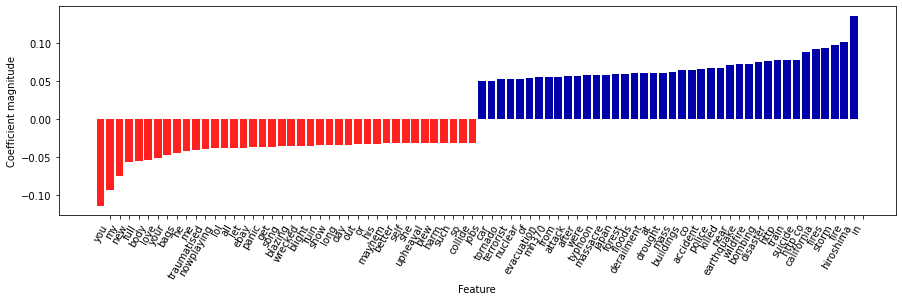

In [ ]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_, feature_names, n_top_features = 40)



'''
# plot them


coef = coeffList.ravel()
positive_coefficients = np.argsort(coef)[-20:]
negative_coefficients = np.argsort(coef)[:20]
interesting_coefficients = np.hstack([negative_coefficients,
                                      positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ["blue" if c < 0 else "red"
          for c in coef[interesting_coefficients]]
plt.bar(np.arange(2 * 20), coef[interesting_coefficients],
        color=colors)

plt.subplots_adjust(bottom=0.3)
plt.xticks(np.arange(1, 1 + 2 * 20),
            feature_names, rotation=60,
            ha="right")
plt.ylabel("Coefficient magnitude")
plt.xlabel("Feature")'''

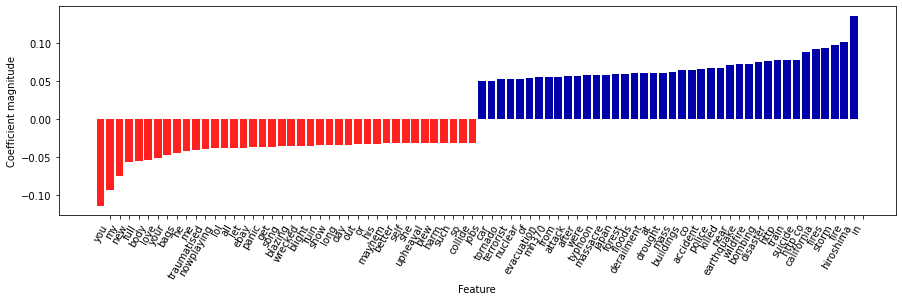

In [ ]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_, feature_names, n_top_features = 40)

In [ ]:
print(feature_names)

['00' '00 at' '00 pm' ... 'ûïwhen saw coaches' 'ûò' 'ûó']


In [ ]:
#Get top and bottom 20 coefficient names (X)
#                                  values (Y)
feature_values = np.array(vectorizer.g)
pltX = feature_names[sorted_by_tfidf[:20]] + feature_names[sorted_by_tfidf[20:]]
pltY = 




fig, ax = plt.subplots()
p1 = ax.bar()


SyntaxError: ignored